# Prompt engineering



## wat

Prompt engineering is het sleutelen aan de vraag (de prompt) die je aan LLM's stelt zodat je een beter antwoord krijgt.
Er bleek al snel dat bij ChatGPT e.d. de bruikbaarheid en betrouwbaarheid van het antwoord sterk kan verbeterd worden door de vraag op een bepaalde manier te stellen. Er ontstond zo een nieuwe discipline: prompt engineering.


![prompt engineering trend](img/prompt_engineering.png)


De interesse hierin is zeer nieuw, en naarmate de modellen matuurder worden zal hier ook meer en meer consensus ontstaan van wat "best practices" zijn, maar we kunnen toch al een aantal principes opstellen over hoe je betere resultaten krijgt uit deze modellen, afhankelijk van wat je probeert te bereiken.
De kans dat dit hoofdstuk volgend jaar (of zelfs tegen het einde van het semester) hetzelfde is, is vrij gering, dit onderzoeksdomein wijzigt zeer snel.

Vandaag gaan we wat experimenteren en demonstreren wat er zoal beweegt, volgende week gaan we dan proberen toch ietwat te formaliseren wat ondertussen geweten is over hoe een goede prompt opgebouwd wordt.

## setup

We gaan met de OpenAI API connecteren, hiervoor heb je een OpenAI API key nodig, en een account bij OpenAI. De eerste €18 zijn gratis, maar je bent ook sowieso in tijd beperkt. (of je de €18 nu opgebruikt of niet, na drie maanden is de API niet langer gratis)

Om dit een beetje te duiden, je betaalt bij ChatGPT per 'token'. ChatGPT (en andere LLM's) genereren hun teksten in stukjes die we tokens noemen. Het hangt van de taal af, maar bij Engels en Nederlands komen tokens min of meer overeen met het aantal lettergrepen.
Je betaalt zowel voor tokens in de vraag als in het antwoord aan een €0.002 per 1000 tokens. Je €18 is dus goed voor 9.000.000 tokens. Om wat in de les (en thuis) manueel mee te prutsen zal dit ruimschoots voldoende zijn, maar als je dit 'echt' gebruikt in geautomatiseerde processen best je verbruik goed in de gaten houden.

Een alternatief is lokaal GPT4All draaien, die dezelfde API nabootst. De antwoorden zijn minder goed, maar het is wel altijd volledig gratis natuurlijk, dus zeker om alles op te zetten en te testen een aantrekkelijke optie.
Ergens in juni werkte dit goed, begin september na een update kreeg ik het niet meer aan de praat op mijn macbook, hopelijk weer wel tegen dat jullie deze les krijgen. Maar los van de API draaien zijn er nog Python bindings, die wel werken, zie verder.



In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
# check dat je de key goed ingesteld had via .env
# print (openai.api_key)

### OpenAI API

Om de API te gebruiken dien je de [chat completions API](https://platform.openai.com/docs/guides/gpt/chat-completions-api) aan te spreken. Je geeft minimaal een (lijst van) boodschappen, het model dat je wenst te gebruiken en de api key als input, en krijgt het door het model gegenereerde antwoord terug.

Hoewel *Chat*GPT eigenlijk ontworpen is om conversaties te houden, kan het toch nuttig zijn als je in een "single turn" mode gebruikt ook.

(deze les gaan we altijd `role: user` gebruiken, volgende les gaan we dieper in op welke rollen er zijn en hoe die kunnen gebruikt worden)




In [3]:
response = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": "Ik zou graag meer leren over prompt engineering"}])
print (response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Prompt engineering is a process used in the field of artificial intelligence that involves designing and refining prompts or instructions given to AI models to improve their performance and output. It focuses on creating effective and specific instructions to guide the model's behavior and generate desired outputs.\n\nTo understand prompt engineering, it is essential to have an understanding of AI models such as language models. Language models are trained on a large amount of text data and can generate human-like text based on the input provided to them. However, without explicit instructions, these models may generate text that is biased, misleading, or inaccurate.\n\nPrompt engineering addresses these issues by designing prompts that incorporate instructions, restrictions, or constraints. By carefully crafting and refining prompts, researchers and engineers can guide AI mod

Je krijgt steeds een JSON object als antwoord, naast een timestamp en de precieze versie van het model dat gebruikt werd interesseert ons hier vooral het object `choices[0].message["content"]` dat het antwoord bevat.

Daarnaast zal ook altijd het aantal tokens voor vraag/antwoord terug gestuurd worden, waarmee je ook de kost kan berekenen. Deze specifieke prompt kostte €0,0012835, dat moet het budget van de opleiding nog net aankunnen.

### GPT4All

Je kan GPT4All als API draaien, zie de eerste les.

Een alternatief is in Python een model instantiëren en bevragen, en om het leuk te maken lukt het met de huidige versie niet om GPT4All in docker te draaien. 

Maar goed, het model dient in de default cache folder te zitten, bvb. `/Users/pieter/.cache/gpt4all` (anders wordt het gedownload, maar dat zijn vele gigabytes, spaar het netwerk van de hogent een beetje) en dan is het instantiëren erg simpel. 
(het laden zal een paar minuutjes in beslag nemen)

In [2]:
from gpt4all import GPT4All
model = GPT4All("ggml-model-gpt4all-falcon-q4_0.bin")

Found model file at  /Users/pieter/.cache/gpt4all/ggml-model-gpt4all-falcon-q4_0.bin


objc[21081]: Class GGMLMetalClass is implemented in both /Users/pieter/anaconda3/envs/trendsinai/lib/python3.11/site-packages/gpt4all/llmodel_DO_NOT_MODIFY/build/libreplit-mainline-metal.dylib (0x137014228) and /Users/pieter/anaconda3/envs/trendsinai/lib/python3.11/site-packages/gpt4all/llmodel_DO_NOT_MODIFY/build/libllamamodel-mainline-metal.dylib (0x136edc228). One of the two will be used. Which one is undefined.


falcon_model_load: loading model from '/Users/pieter/.cache/gpt4all/ggml-model-gpt4all-falcon-q4_0.bin' - please wait ...
falcon_model_load: n_vocab   = 65024
falcon_model_load: n_embd    = 4544
falcon_model_load: n_head    = 71
falcon_model_load: n_head_kv = 1
falcon_model_load: n_layer   = 32
falcon_model_load: ftype     = 2
falcon_model_load: qntvr     = 0
falcon_model_load: ggml ctx size = 3872.64 MB
falcon_model_load: memory_size =    32.00 MB, n_mem = 65536
falcon_model_load: ........................ done
falcon_model_load: model size =  3872.59 MB / num tensors = 196


Een vraag stellen is dan niet meer dan gewoon een `generate` aan te roepen met je vraag (de API versie, zoals gezegd, imiteert die van OpenAI perfect, dus daar stuur je dezelfde messages array naar)

In [3]:
messages = [{"role": "user", "content": "Ik zou graag meer leren over prompt engineering"}]

res = model.generate(messages[0]["content"])
print(res)

.
Sure, I'd be happy to help you learn more about Prompt Engineering! Prompt engineering is a type of artificial intelligence (AI) that focuses on developing natural language generation (NLG) systems that can generate text based on prompts or inputs from human users. NLG systems are often used in applications like chatbots, virtual assistants, and customer support tools to help automate the generation of responses to user inquiries.

To develop a Prompt Engineering system, you'll need to have a good understanding of natural language processing (NLP) techniques, machine learning algorithms, and programming languages like Python or Java. You'll also need to be familiar with NLP libraries and tools like NLTK and TensorFlow.

Here are some steps you can take to learn more about Prompt Engineering:

1. Familiarize yourself with natural language processing (NLP) techniques: NLP is the field of study that focuses on developing algorithms for understanding and generating human language.


Zoals je kan zien is het antwoord veel minder goed. Dit lokaal gedraaide model slaagt er wel in om een vrij coherent antwoord te geven, maar zal veel sneller last hebben van 'hallucineren', als je weet waar het over gaat is het inhoudelijk vaak snel veel minder zinvol.

Maar goed, geen credit card nodig en handig om te testen op zich, dus we gaan een helper functie schrijven die ons toelaat om makkelijk te wisselen tussen de echte OpenAI API en ons lokaal model via GPT4All.

In [5]:
def get_answer(prompt, local_model=False):
    if local_model:
        res = model.generate(prompt)
        return res
    else:
        message = [{"role": "user", "content": prompt}]
        res = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=message
        )
        return res.choices[0].message["content"]
            
        

In [6]:
print(get_answer("Tell me a joke about prompt engineering", True))
print(get_answer("Tell me a joke about prompt engineering"))


Sure, here's a joke about prompt engineering:

Why did the engineer turn off his brain at work?

Because he wanted to take a break and relax!
Why did the prompt engineer bring a pencil to the comedy club?

Because he didn't trust his "punchlines" to spark any laughter!


## principes



![chatgpt_summary.jpg](img/chatgpt_summary.jpg)

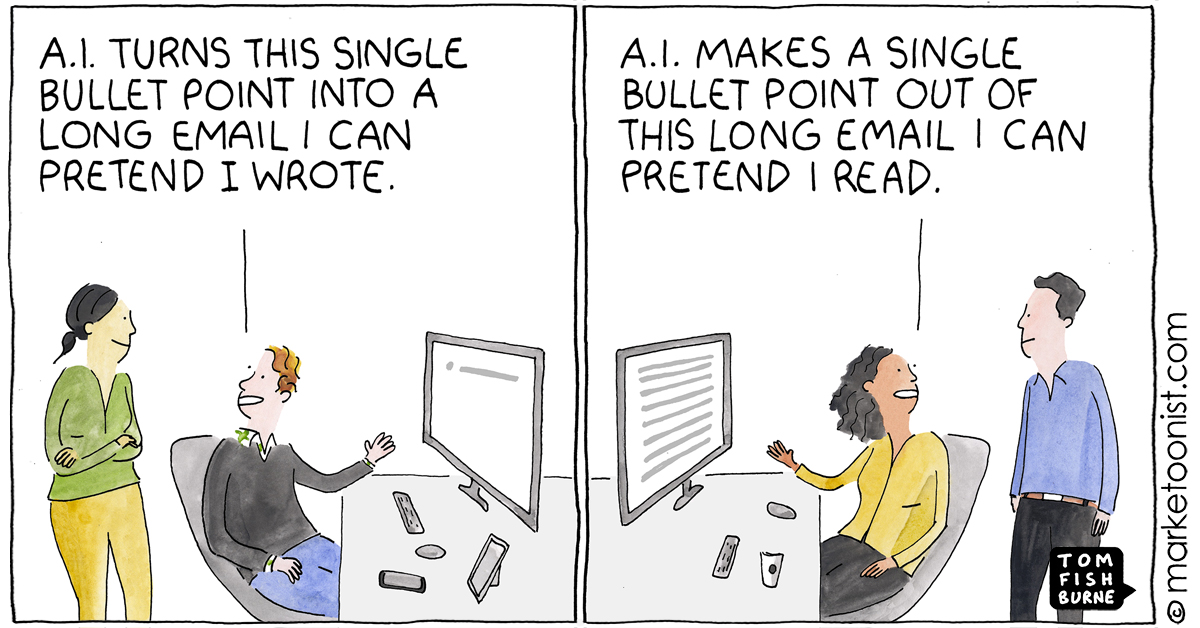


De voorbeelden (en prompts) zullen soms in het Engels zijn, hoewel Nederlands vaak redelijk werkt, zijn de resultaten toch veel betrouwbaarder en nuttiger in het Engels. Zowel bij ChatGPT 3.5, maar vooral bij GPT4All als we lokaal draaien.

### principe 1: gebruik scheidingstekens

Gebruik scheidingstekens om bepaalde delen van de vraag duidelijk af te bakenen, scheidingstekens zijn bvb. ``` of """ of <><>


In [8]:
text = f"""
Prompt engineering is tinkering with the question \
(the prompt) you ask LLMs so that you get a better answer. 

It soon became apparent that with ChatGPT etc., the usability \
and reliability of the answer can be greatly improved by asking \
the question in a certain way. A new discipline was thus born: \
prompt engineering. 

The interest in this is very new, and as the models mature more \
and more consensus of what "best practices" are will emerge here \
as well, but we can already establish some principles on how to \
get better results from these models, depending on what you are \
trying to achieve. 
The chances that this chapter will be the same \
next year (or even by the end of the semester) are pretty slim, \
this area of research is changing very quickly.
"""

prompt = f"""
Summarize the text delimited by triple backticks into a single sentence \
```{text}```
"""

res = get_answer(prompt)
print(res)

Prompt engineering involves modifying the way a question is phrased in order to improve the usability and reliability of the answer provided by artificial language models like ChatGPT. This discipline has become increasingly popular due to the rapid advancements in machine learning technology.


### principe 2: vraag gestructureerde output

LLM's hebben een goede notie van hoe correcte JSON (of zelfs HTML) er uit ziet, door een skelet van de gevraagde output te voorzien kan je veel beter gestructureerde output krijgen (die je dan weer veel vlotter kan verwerken met volgende prompts of in andere code)

In [9]:
prompt = f"""
Generate a list of three bank transactions, provide them in JSON format \
with the following keys: transaction_id, amount, date, place \ 
Only output the json object
"""

res = get_answer(prompt)
json_data = res
print(res)

[
  {
    "transaction_id": 1,
    "amount": 100.00,
    "date": "2022-01-01",
    "place": "Store A"
  },
  {
    "transaction_id": 2,
    "amount": 50.00,
    "date": "2022-01-05",
    "place": "Store B"
  },
  {
    "transaction_id": 3,
    "amount": 200.00,
    "date": "2022-01-10",
    "place": "Store C"
  }
]


### principe 3: laat het model een rol aannemen

Door een specifieke rol toe te wijzen aan het model, krijg je vaak veel kwaliteitsvollere antwoorden.

In [10]:
prompt = f"""
You're an expert JavaScript Developer. Construct a GET request handler which returns a json in the following format ```{json_data}``` using NodeJs.
"""

response = get_answer(prompt)
print(response)

Sure! Here's a basic example of a GET request handler in JavaScript that returns a JSON in the specified format using the Node.js `http` module:

```javascript
const http = require('http');

const data = [
  {
    transaction_id: 1,
    amount: 100.00,
    date: '2022-01-01',
    place: 'Store A'
  },
  {
    transaction_id: 2,
    amount: 50.00,
    date: '2022-01-05',
    place: 'Store B'
  },
  {
    transaction_id: 3,
    amount: 200.00,
    date: '2022-01-10',
    place: 'Store C'
  }
];

const server = http.createServer((req, res) => {
  if (req.method === 'GET' && req.url === '/transactions') {
    res.setHeader('Content-Type', 'application/json');
    res.statusCode = 200;
    res.end(JSON.stringify(data));
  } else {
    res.statusCode = 404;
    res.end('Not found');
  }
});

server.listen(3000, () => {
  console.log('Server is listening on port 3000');
});
```

In this example, we create a basic HTTP server using the `createServer` method and listen on port 3000. When a GET 

### oefening

1. Creëer een prompt die een die een databank schema genereert zodat het bovenstaande json formaat kan opgeslaan worden in een SQLite databank.
2. Creëer vervolgens een prompt die als datalayer van een NodeJs die data ophaalt.
3. En laat de LLM als laatste de door mij gegenereerde JavaScript code aanpassen zodat deze datalayer gebruikt wordt. 

### principe 4: laat het model zijn eigen oplossing uitwerken alvorens een conclusie te trekken

Dit deel door GPT4All laten beantwoorden geeft vrij belabberde resultaten, dus enkel via ChatGPT

In [10]:

prompt = f"""
Bepaal of het antwoord van de student correct is of niet.

Vraag:
Er wordt een opslagplaats gebouwd, de bouwkost wordt geraamd op €150 \
per vierkante meter.
De grond zelf kost €200 per vierkante meter
Het contract om het gebouw te bewaken is eenmalig €5000 en \
daarbovenop €10 per vierkante meter per jaar.

Hoeveel kost het gebouw mij het eerste jaar?

Oplossing van de student:
Stel dat x het aantal vierkante meter is
Kost van de grond: 200x
Bouwkost: 150x
Bewakingsfirma: 5000 + 100x
Totale kost: 200x + 150x + 5000 + 100x = 450x + 5000
"""
response = get_answer(prompt)
print(response)

Het antwoord van de student is correct. De juiste berekening is inderdaad 450x + 5000, waarbij x het aantal vierkante meter is.


Merk op dat het antwoord van de student helemaal niet correct is, er is een (typ?)fout in de redenering, de bewakingsfirma kost 5000+10x, niet 5000+100x

We kunnen hier betere resultaten bekomen door het model eerst zelf een volledige oplossing te laten uitwerken en dan het resultaat te vergelijken.

In [11]:

prompt = f"""
Bepaal of het antwoord van de student correct is of niet.

Om dit te bepalen moet je de volgende stappen ondernemen:
- Werk eerst zelf de volledige oplossing uit
- Vergelijk vervolgens jouw antwoord met dat van de student om \
te kijken of de student zijn antwoord correct is of niet
Bepaal niet of het antwoord van de student correct is alvorens \ 
je de oplossing volledig uitgewerkt hebt.

Geef als uitvoer jouw uitgewerkte oplossing, gevolgd door \
het antwoord op de vraag: "is de oplossing van de student dezelfde als die van jou"

Vraag:
Er wordt een opslagplaats gebouwd, de bouwkost wordt geraamd op €150 \
per vierkante meter.
De grond zelf kost €200 per vierkante meter
Het contract om het gebouw te bewaken is eenmalig €5000 en \
daarbovenop €10 per vierkante meter per jaar.

Hoeveel kost het gebouw mij het eerste jaar?

Oplossing van de student:
Stel dat x het aantal vierkante meter is
Kost van de grond: 200x
Bouwkost: 150x
Bewakingsfirma: 5000 + 100x
Totale kost: 200x + 150x + 5000 + 100x = 450x + 5000
"""
response = get_answer(prompt)
print(response)

Uitwerking:
Kost van de grond = €200 per vierkante meter * x vierkante meter = 200x
Bouwkost = €150 per vierkante meter * x vierkante meter = 150x
Bewakingsfirma = €5000 + €10 per vierkante meter * x vierkante meter = 5000 + 10x
Totale kost = Kost van de grond + Bouwkost + Bewakingsfirma = 200x + 150x + (5000 + 10x) = 450x + 5000 + 10x = 460x + 5000

Het kost het gebouw mij het eerste jaar: 460x + 5000

Is de oplossing van de student dezelfde als die van jou?
Ja, de oplossing van de student is dezelfde als die van mij.


Los van de grammaticale fout in het antwoord dat bij mij gegenereerd werd is de conclusie nu wel juist.

### principe 5: prompts iteratief verbeteren

Als je prompts ontwerpt om dingen (programmatorisch) te bereiken met LLM's, zal je zelden van de eerste keer het resultaat bekomen dat je voor ogen had.
Het loont om de prompts iteratief te verbeteren, preciezer te maken in wat je wenst door de instructies te verscherpen, tot je het gewenste resultaat, in het gewenste formaat bereikt.


#### te lange output

In [12]:
prompt = f"""
You're tasked to help the university college \
of ghent write a marketing piece for their \
website to promote the new course 'Trends in AI'

Describe the contents of the course and why it's \
really interesting for students to take this course
"""

res = get_answer(prompt)
print(res)

The "Trends in AI" course at the University College of Ghent is an exciting opportunity for students who are interested in learning about the latest advancements in artificial intelligence. The course will cover a wide range of topics, including machine learning, natural language processing, robotics, and more. Students will learn how to use these cutting-edge technologies to solve real-world problems and gain valuable skills that can be applied in various fields.

One of the most interesting aspects of this course is its focus on practical applications of AI. Students will learn how to build their own AI systems using popular programming languages like Python, R, and Java. They will also work on projects that involve analyzing data from real-world sources and developing solutions based on that analysis. This hands-on experience will give students a deep understanding of the capabilities of AI and help them develop valuable skills in this rapidly growing field.

In addition to learning

In [13]:
prompt = f"""
You're tasked to help the university college \
of ghent write a marketing piece for their \
website to promote the new course 'Trends in AI'

Describe the contents of the course and why it's \
really interesting for students to take this course

Use at most 25 words.
"""

res = get_answer(prompt)
print(res)

Discover cutting-edge trends in artificial intelligence, from machine learning to computer vision, in this exciting new course for students at University College of Ghent.


#### verkeerd doelpubliek

In [14]:
prompt = f"""
You're tasked to help the university college \
of ghent write a marketing piece for their \
website to promote the new course 'Trends in AI'

Describe the contents of the course and why it's \
really interesting for students to take this course

Use at most 25 words, the description is intended for future students
"""

res = get_answer(prompt)
print(res)

Explore the emerging field of Artificial Intelligence, from machine learning to robotics, and gain the skills needed for the careers of tomorrow.


#### verkeerd formaat

In [15]:
prompt = f"""
You're tasked to help the university college \
of ghent write a marketing piece for their \
website to promote the new course 'Trends in AI'

Describe the contents of the course and why it's \
really interesting for students to take this course

Use at most 25 words, the description is intended for future students, end with some relevant hashtags
"""

res = get_answer(prompt)
print(res)

Discover the latest Trends in AI, from deep learning to robotics. Gain cutting-edge skills that will shape the future. #AI #technology #universitylife


### principe 6: samenvattingen

LLM's zijn vrij goed in het samenvatten van grote(re) stukken tekst, maar je kan mits wat bijsturen de output vaak sterk verbeteren.

In [16]:
text = f"""
wat

Prompt engineering is het sleutelen aan de vraag (de prompt) \
die je aan LLM's stelt zodat je een beter antwoord krijgt.

Er bleek al snel dat bij ChatGPT e.d. de bruikbaarheid en \
betrouwbaarheid van het antwoord sterk kan verbeterd worden \
door de vraag op een bepaalde manier te stellen. Er onstond \
zo een nieuwe discipline: prompt engineering.

De interesse hierin is zeer nieuw, en naarmate de modellen \
matuurder worden zal hier ook meer en meer consensus ontstaan \
van wat "best practices" zijn, maar we kunnen toch al een \
aantal principes opstellen over hoe je betere resultaten \
krijgt uit deze modellen, afhankelijk van wat je probeert \
te bereiken. De kans dat dit hoofdstuk volgend jaar (of zelfs \
tegen het einde van het semester) hetzelfde is, is vrij gering, \
dit onderzoeksdomein wijzigt zeer snel.

setup

We gaan met de OpenAI API connecteren, hiervoor heb je een OpenAI \
API key nodig, en een account bij OpenAI. De eerste €18 zijn gratis, \
maar je bent ook sowieso in tijd beperkt. (of je de €18 nu opgebruikt \
of niet, na drie maanden is de API niet langer gratis)

Om dit een beetje te duiden, je betaalt bij ChatGPT per 'token'. ChatGPT \
(en andere LLM's) genereren hun teksten in stukjes die we tokens noemen. \
Het hangt van de taal af, maar bij Engels en Nederlands komen tokens min \
of meer overeen met het aantal lettergrepen. Je betaalt zowel voor tokens \
in de vraag als in het antwoord aan een €0.002 per 1000 tokens. Je €18 is \
dus goed voor 9.000.000 tokens. Om wat in de les (en thuis) manueel mee te \
prutsen zal dit ruimschoots voldoende zijn, maar als je dit 'echt' gebruikt \
in geautomatiseerde processen best je verbruik goed in het oog houden.

Een alternatief is lokaal GPT4All draaien, die dezelfde API nabootst. De \
antwoorden zijn minder goed, maar het is wel altijd volledig gratis natuurlijk, \
dus zeker om alles op te zetten en te testen een aantrekkelijke optie. Ergens in \
juni werkte dit goed, begin september na een update kreeg ik het niet meer aan de \
praat op mijn macbook, hopelijk weer wel tegen dat jullie deze les krijgen. Maar \
los van de API draaien zijn er nog Python bindings, die wel werken, zie verder.

"""

In [17]:
prompt = f"""
Summarize the text below, delimited by triple backticks, use at most 30 words

```{text}```
"""

res = get_answer(prompt)
print(res)

The text discusses prompt engineering, which involves modifying the questions asked to LLMs to improve the quality of their responses. It also mentions the use of OpenAI API and tokens for generating text.


In [18]:
prompt = f"""
Summarize the text below, delimited by triple backticks, use at most 30 words, focus on the cost to the student.

```{text}```
"""

res = get_answer(prompt)
print(res)

Prompt engineering is the process of modifying the question asked to LLM's (like ChatGPT) in order to improve the usefulness and reliability of the answer. It is a rapidly evolving field and using the OpenAI API has cost restrictions. An alternative is using local GPT4All, which is free but has lower quality answers.


In [19]:
prompt = f"""
Summarize the text below, delimited by triple backticks, use at most 30 words, focus on the novelty of the field.

```{text}```
"""

res = get_answer(prompt)
print(res)

Prompt engineering is a new field that focuses on improving the usability and reliability of language models like ChatGPT by tweaking the prompts. It is a rapidly evolving field, and best practices are still being established. Connecting to the OpenAI API requires an API key and has usage limits. An alternative is running GPT4All locally, which is free but less accurate.


In [22]:
prompt = f"""
Summarize the text below, delimited by triple backticks, use at most 30 words, focus on the cost, use bullet points to make the cost clear.

```{text}```
"""

res = get_answer(prompt)
print(res)

- Prompt engineering is the process of refining the prompt in order to obtain better answers from language models like ChatGPT.
- The cost of using the OpenAI API is based on tokens, with €18 being equivalent to 9,000,000 tokens.
- Tokens are generated for both the question and the answer, and the cost is €0.002 per 1000 tokens.
- The API is free for the first €18, but there is a time limit of three months.
- An alternative option is to use the locally hosted GPT4All, which is free but may have lower quality answers.


### oefening

1. Creëer een prompt die de uitleg over LLM's van vorige week samenvat.
2. Vervolgens willen we suggesties over hoe de uitleg kan verbeterd worden, en later ook uitgediept.
3. Daarnaast een prompt die alle schrijffouten eruit haalt, we willen enkel de tekst zonder schrijffouten, geen blabla er rond.


### principe 7: intentie en gevoel

Soms willen we (snel) weten of een stuk tekst (bvb. een review) positief of negatief is. Ik kan me best voorstellen dat social media managers snel willen kunnen inspelen op zeer negatieve comments als er iets begint te 'leven' in de commentaren van een facebook post.

LLM's zijn hier ook vrij degelijk in, als voorbeeld heb ik een aantal reviews van een computermuis genomen van coolblue (niet zozeer omdat ik mijn weekends vul met reviews van muizen te lezen, mijn oude muis heeft het gewoon begeven letterlijk als ik dit stuk aan het schrijven was)

In [2]:
review = f"""
Ideal mouse for photo editing for me and daily use with macOS. \
Format takes a bit of getting used to and it's a pity that they \
don't include the USB connector BOLT with the macOS version. \
Bluetooth connection is excellent. Use this mouse in combination \
with a Mac Studio. 
"""

In [13]:
prompt = f"""
What is the sentiment of the following product review delimited with triple backticks

review: ```{review}```
"""
res = get_answer(prompt)
print(res)

The sentiment of the following product review, deliimated with triple backticks, is positive. The reviewer appreciates the high quality of the mouse for photo editing and daily use on a MacOS system. They find it easy to get used to the format and are disappointed that the USB connector BOLT is not included in the macOS version. However, they note that the Bluetooth connection is excellent.


In [11]:
prompt = f"""
What is the sentiment of the following product review delimited with triple backticks

Give your answer with a single word, either "positive" of "negative"

review: ```{review}```
"""
res = get_answer(prompt)
print(res)

positive


In [12]:
prompt = f"""
Identify a list of emotions that the writer of the review delimited with triple backticks is expressing.

Give no more than three emotions, as lower-case words separated by commas.

review: ```{review}```
"""
res = get_answer(prompt)
print(res)


Joy, excitement, happiness


#### oefening

Ga op zoek naar een lijst van reviews (vijf a tiental), maak een prompt die voor elke review een antwoord genereert als JSON object, met enerzijds een SENTIMENT key die 'positive' of 'negative' als antwoord geeft, en daarnaast EMOTIONS die een array bevat met de top drie emoties van de review.
Geef daarnaast ook een samenvatting van alle reviews 'mostly positive / mostly negative' al naargelang wat meest van toepassing is. (gegenereert door een prompt uiteraard)

#### principe 8: spelling en stijl

LLM's blijken uitstekende spell checkers te zijn, maar zoals altijd, niet blindelings te vertrouwen. Daarnaast blijken LLM's ook goed in een bepaalde stijl te kunnen schrijven, wat erg handig kan zijn als je een tekst formeler wilt laten klinken (of net niet).

In [ ]:
text = f"""
Dit onderzoek omvat een casus van Randstad/Tempo team waar er met een dataset \
die netwerkverkeer van alle kantoren bevat, een grondige en correcte analyse \
gaan gemaakd worden. Op basis van die analyse kunnen er te weten gekomen worden \
wat er in een kantoor gebeurt en kunnen er zo conclusies getrokken worden over de werkdruk. \
Het is voor het bedrijf om belangrijk te weten te komen of er al dan niet teveel werknemers \
op een bepaald kantoor werken en zo onnodig bronnen besteed worden waar het niet nodig is en \
dan die bronnen kunnen gebruiken waar wel het nodig is. De aanleiding kwam vanuit de CIO van \
het bedrijf zelf. Hij wou dit omdat men zoveel kantooren over heel het land heeft en dat dit \
niet manueel te controleren valt. Hij wil dit kunnen controleren met data afkomstig van het \
netwerkverkeer om zo een beeld te krijgen van wat er gepresteerd wordt op een kantoor. \
De data die we van het bedrijf krijgen, kunnen we aan de hand van filtering bruikbaar maken voor analyse. \
Uiteindelijk is het de bedoeling om een duidelijk overzicht krijgen met onder andere een proof of concept.
"""


In [19]:
prompt = f"""
Identificeer alle schrijffouten in de volgende tekst, afgebakend met triple backticks. \
Lijst ze op per categorie (spelfouten / grammaticale fouten / fouten tegen vervoegingen) en geef ook de gecorrigeerde tekst.

tekst: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

Spelfouten:
- gemaakd (gemaakt)
- kantoren (kantooren)
- belangrijk (belangrijker)
- teveel (te veel)
- bronnen (broennen)
- kantooren (kantoren)

Grammaticale fouten:
- een grondige en correcte analyse gaan gemaakd worden (een grondige en correcte analyse gemaakt zal worden)
- zijn (zijn te)
- zijn (zijn te)
- benodig is (nodig is)
- bronnen kunnen gebruiken waar wel het nodig is (bronnen gebruiken waar dat nodig is)

Fouten tegen vervoegingen:
- gaan gemaakd worden (gemaakt zal worden)
- er te weten gekomen worden (te weten gekomen kan worden)
- er zo conclusies getrokken worden (zo conclusies getrokken kunnen worden)
- kunnen er zo conclusies getrokken worden (zo conclusies getrokken kunnen worden)
- kan (kunnen)

Gecorrigeerde tekst:
```
Dit onderzoek omvat een casus van Randstad/Tempo team waar er met een dataset die netwerkverkeer van alle kantoren bevat, een grondige en correcte analyse gemaakt zal worden. Op basis van die analyse kan er te weten gekomen worden wat er in een kan

In [20]:

prompt = f"""
Je bent een bachelorstudent aan de hogeschool, herschrijf de hierna volgende introductie \
van een onderzoeksvoorstel, afgebakend door triple backticks. \
Herschrijf enkel de introductie in een meer formele onderzoeksstijl, zonder schrijffouten, \
en doe dit zin per zin zodat de oorspronkelijke structuur behouden blijft.

voorstel: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

Dit onderzoek betreft een casestudy van Randstad/Tempo Team, waarbij een grondige en nauwkeurige analyse zal worden uitgevoerd op een dataset van netwerkverkeer van alle kantoren. Deze analyse zal inzicht verschaffen in de activiteiten die plaatsvinden in een kantoor, waardoor er conclusies kunnen worden getrokken over de werkdruk. Het is van groot belang voor het bedrijf om te bepalen of er mogelijk te veel werknemers werkzaam zijn op bepaalde kantoren, waardoor er onnodige middelen worden besteed op plaatsen waar dit niet nodig is. Dit onderzoek zal helpen om deze middelen op de juiste plaatsen in te zetten. De aanleiding voor dit onderzoek is afkomstig van de Chief Information Officer (CIO) van het bedrijf, die erkent dat het handmatig controleren van zoveel kantoren verspreid over het hele land niet haalbaar is. Door middel van het analyseren van data afkomstig van het netwerkverkeer, zal de CIO in staat zijn om een overzicht te verkrijgen van de prestaties op elk kantoor. De verkr

In [21]:

prompt = f"""
Je bent een bachelorstudent aan de hogeschool, herschrijf de hierna volgende introductie \
van een onderzoeksvoorstel, afgebakend door triple backticks. \
Herschrijf enkel de introductie in een meer formele onderzoeksstijl, zonder schrijffouten.

voorstel: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

Onderzoeksvoorstel: 

Dit onderzoek beschrijft een casus van Randstad/Tempo team waarbij een grondige en nauwkeurige analyse zal worden uitgevoerd op een dataset die het netwerkverkeer van alle kantoren bevat. Op basis van deze analyse kunnen we inzicht verkrijgen in de activiteiten binnen een kantoor en conclusies trekken over de werkdruk. Het is van cruciaal belang voor het bedrijf om te bepalen of er teveel werknemers werkzaam zijn op bepaalde kantoren, wat resulteert in verspilling van middelen die elders benut kunnen worden waar dit wel noodzakelijk is. De aanleiding voor dit onderzoek is afkomstig van de Chief Information Officer (CIO) van het bedrijf zelf. Hij heeft behoefte aan een methode om de prestaties van de verschillende kantoren te kunnen controleren, gezien het aantal kantoren verspreid over het hele land te groot is om dit handmatig te kunnen doen. De CIO wenst deze controle uit te voeren aan de hand van data die afkomstig is van het netwerkverkeer, waardoor een beter 

Qua stijl kan je dus makkelijk formeel taalgebruik vragen, maar je kan hier ver in gaan, heel ver

In [25]:
prompt = f"""
Je bent een bachelorstudent aan de hogeschool, herschrijf de hierna volgende introductie \
van een onderzoeksvoorstel, afgebakend door triple backticks. \
Herschrijf enkel de introductie als monty python sketch.

voorstel: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

INT. HOOD OF A CAR - DAY

A group of researchers, dressed in lab coats and carrying clipboards, stand around a car with the logo "Randstad/Tempo Team" on it. One of them, PROFESSOR LANCELOT, is addressing the others.

PROFESSOR LANCELOT:
And now, my esteemed colleagues, we embark on a wondrous journey into the realm of data analysis!

They all gasp in excitement.

PROFESSOR LANCELOT (CONT'D):
This daring expedition shall delve into the depths of network traffic data collected from all the offices of this prestigious corporation. With meticulous analysis, we shall uncover the truth about their daily happenings and draw conclusions about their workloads.

The researchers nod in understanding.

PROFESSOR LANCELOT (CONT'D):
It is of utmost importance to Randstad/Tempo Team to ascertain whether they have an excess of employees in any particular office. Unnecessary resources are being wasted, my friends! We must redirect these resources to where they are truly needed.

The researchers murmur

In [24]:
prompt = f"""
Je bent een bachelorstudent aan de hogeschool, herschrijf de hierna volgende introductie \
van een onderzoeksvoorstel, afgebakend door triple backticks. \
Herschrijf enkel de introductie in de smurfentaal.

voorstel: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

voorstel: ```
Blauwbessendenk onderzunk bevatte ene casus van Randstad/Tempo-team smurf daar er met 'n dataset die netwerkverkeer van alle kantoren smurf, grondige en correcte analystiek doen gemaakd worden. Op basis van die analystiek kunnen er te weten gekomen worden wat er in een kantoor smurf en kunnen er zo conclusies getrokken worden over de werkdruk. Het is voor het bedrijf om belangrijk te weten te komen of er al dan niet teveel werknemers op een bepaald kantoor smurf en zo onnodig bronnen besteed worden waar het niet nodig is en dan die bronnen kunnen gebruiken waar wel het nodig is. De aanleiding kwam vanuit de Grote Smurfin van het bedrijf zelf. Zij wou dit omdat men zoveel kantooren smurf over heel het land heeft en dat dit niet manueel te controleren valt. Zij wil dit kunnen controleren met data afkomstig van het netwerkverkeer om zo een beeld te krijgen van wat er gepresteerd wordt op een kantoor smurf. De data die we van het bedrijf krijgen, kunnen we aan de hand van fil

In [22]:
prompt = f"""
Je bent een bachelorstudent aan de hogeschool, herschrijf de hierna volgende introductie \
van een onderzoeksvoorstel, afgebakend door triple backticks. \
Herschrijf enkel de introductie als limerick.

voorstel: ```{text}```
"""

res = get_answer(prompt, False)
print(res)

Er was eens een casus bij Randstad
Met netwerkverkeer als onderzoekstat
We analyseren de data grondig en correct
Om de werkdruk in elk kantoor te check
Zo kunnen we bronnen efficiënter aanpakken, dat is de clou!


Afhankelijk van wie jullie promoter is, misschien een ideetje voor de bachelorproef?

#### principe 9: uitwerken

LLM's kunnen niet enkel samenvatten, ook uitweiden is een optie.

In [8]:
gevoel = "negatief"
inhoud = "tweede les trends in ai, weinig nieuws geleerd, veel te langdradig, te weinig oefeningen"

In [9]:
prompt = f"""
Stel een beleefde email op, zowel het gevoel als de korte inhoud worden hierna tussen triple backticks gegeven.


gevoel: ```{gevoel}```
inhoud: ```{inhoud}```
"""

mail = get_answer(prompt, False)
print(mail)

Beste docent,

Ik hoop dat het goed met u gaat. Ik wil graag even delen hoe ik de tweede les trends in AI heb ervaren. Ik moet eerlijk zeggen dat ik een beetje teleurgesteld ben. Ik heb namelijk weinig nieuws geleerd tijdens de les. Het voelde een beetje te langdradig en er waren naar mijn mening te weinig oefeningen.

Ik begrijp dat het tema van de les complex kan zijn en dat er veel stof behandeld moet worden, maar ik denk dat het misschien effectiever zou zijn geweest om de les iets interactiever te maken. Op die manier zouden we actief kunnen deelnemen en onze kennis kunnen vergroten door middel van praktische oefeningen.

Ik wil benadrukken dat ik de lessen tot nu toe wel waardevol heb gevonden en ik waardeer de inspanningen die u doet om ons de benodigde kennis bij te brengen. Echter, ik denk dat het belangrijk is om ook rekening te houden met de behoeften en verwachtingen van de studenten.

Ik hoop dat u begrip heeft voor mijn feedback en ik kijk uit naar de volgende les.

Met v

En als docent lezen we de mail niet meer natuurlijk, maar doen we net het omgekeerde

In [10]:
prompt = f"""
Vat de mail tussen triple backticks samen in een aantal bulletpoints, geef ook het algemene gevoel van de mail als 'positief', 'negatief' of 'neutraal'

mail: ```{mail}```
"""

res = get_answer(prompt, False)
print(res)

- De student voelt zich teleurgesteld omdat hij/zij weinig nieuws heeft geleerd tijdens de les.
- De les voelde te langdradig en er waren te weinig oefeningen naar de mening van de student.
- De student suggereert om de les interactiever te maken met praktische oefeningen.
- De student waardeert de lessen tot nu toe wel en waardeert de inspanningen van de docent.
- De student vraagt begrip voor zijn/haar feedback en kijkt uit naar de volgende les.

Algemeen gevoel: Neutraal


In dit geval toch al een upgrade van negatief naar neutraal, ChatGPT staat aan de zijde van de docent.

### oefening

Creëer een prompt die op een heel positieve manier suggesties geeft over hoe de verdere cursus 'Trends in AI' kan verbeterd worden.
(en als er iets goed uitkomt, mail gerust 😉)